In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm

In [2]:
df1 = pd.read_csv('house.csv')
df1.head()

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3


In [6]:
label_encoder = LabelEncoder()
n_bins = 5
df = pd.DataFrame(data=norm.rvs(loc=500, scale=50, size=100),
                  columns=['PRICE'])

In [7]:
df.head()

,PRICE
0,518.863827
1,484.378204
2,490.062496
3,537.446453
4,437.368020


In [8]:
y = label_encoder.fit_transform(pd.cut(df['PRICE'], n_bins, retbins=True)[0])

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rfc = RandomForestClassifier(n_estimators=100, verbose=2)

In [17]:
rfc.fit(df[['PRICE']], y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=2, warm_start=False)

In [18]:
df.head()

,PRICE
0,518.863827
1,484.378204
2,490.062496
3,537.446453
4,437.368020


In [19]:
df['new'] = y

In [20]:
df.head()

,PRICE,new
0,518.863827,3
1,484.378204,2
2,490.062496,2
3,537.446453,3
4,437.368020,1


In [21]:
df1.head()

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3


In [22]:
nbins = 3
z = label_encoder.fit_transform(pd.cut(df1['Distance'], n_bins, retbins=True)[0])

In [23]:
z

array([3, 2, 2, ..., 3, 3, 1])

In [24]:
df1['GroupDistance'] = z

In [25]:
df1.head()

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom,GroupDistance
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2,3
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2,2
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2,2
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3,2
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3,2


In [26]:
df1

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom,GroupDistance
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2,3
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2,2
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2,2
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3,2
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3,2
...,...,...,...,...,...,...,...,...,...,...,...
4761,3,h,1150000,VB,Southern Metropolitan,2,1,305,18.7,3,2
4762,3,h,712000,S,South-Eastern Metropolitan,1,0,105,16.0,4,1
4763,4,h,800000,S,South-Eastern Metropolitan,1,0,120,24.5,3,3
4764,3,u,747000,S,South-Eastern Metropolitan,1,1,0,22.9,3,3


In [2]:
df = pd.read_csv('Life Expectancy Data.csv')
df.head

<bound method NDFrame.head of           Country  Year      Status  Life expectancy  Adult mortality  \
0     Afghanistan  2015  Developing             65.0            263.0   
1     Afghanistan  2014  Developing             59.9            271.0   
2     Afghanistan  2013  Developing             59.9            268.0   
3     Afghanistan  2012  Developing             59.5            272.0   
4     Afghanistan  2011  Developing             59.2            275.0   
...           ...   ...         ...              ...              ...   
2933     Zimbabwe  2004  Developing             44.3            723.0   
2934     Zimbabwe  2003  Developing             44.5            715.0   
2935     Zimbabwe  2002  Developing             44.8             73.0   
2936     Zimbabwe  2001  Developing             45.3            686.0   
2937     Zimbabwe  2000  Developing             46.0            665.0   

      Infant deaths  Alcohol  Percentage expenditure  Hepatitis B  Measles  \
0              

In [4]:
df['Status'].unique()

array(['Developing', nan, 'Developed'], dtype=object)

In [6]:
df['Alcohol'].skew()

0.5895625281160799

In [9]:
q1 = df['Alcohol'].quantile(0.25)
q3 = df['Alcohol'].quantile(0.75)
iqr = q3 - q1
ul = q3 + 1.5*iqr
ll = q1 - 1.5*iqr
df[(df['Alcohol']< ll) | (df['Alcohol'] > ul)]

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling


In [21]:
def funct(data,col_name):
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    ul = q3 + 1.5*iqr
    ll = q1 - 1.5*iqr
    print(df[(data[col_name]< ll) | (data[col_name] > ul)])

funct(df,'Alcohol')

Empty DataFrame
Columns: [Country, Year, Status, Life expectancy, Adult mortality, Infant deaths, Alcohol, Percentage expenditure, Hepatitis B, Measles, BMI, Under-five deaths, Polio, Total expenditure, Diphtheria, HIV/AIDS, GDP, Population, Thinness  1-19 years, Thinness 5-9 years, Income composition of resources, Schooling]
Index: []

[0 rows x 22 columns]


In [20]:
df = pd.DataFrame(df)
df

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165,1.6,1.7,0.427,9.8


In [22]:
mn = df['Life expectancy'].min()
ma = df['Life expectancy'].max()
me = df['Life expectancy'].mean()
a = mn
d = ma
b = (df['Life expectancy'].min() + df['Life expectancy'].mean()) / 2
c = (df['Life expectancy'].mean() + df['Life expectancy'].max()) / 2

In [26]:
ledict = {'high' : [ x for x in range(int(c),int(d))],
         'avge': [ y for y in range(int(b),int(c))],
         'low': [ z for z in range(int(a),int(b))]}

In [27]:
df['label_LifeExpectancy'] = df['Life expectancy'].map(ledict)

In [28]:
df.head()

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling,label_LifeExpectancy
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,NaN
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582,17.5,17.5,0.476,10.0,NaN
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688,17.7,17.7,0.470,9.9,NaN
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958,17.9,18.0,0.463,9.8,NaN
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599,18.2,18.2,0.454,9.5,NaN


In [29]:
df['label_LifeExpectancy']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2933    NaN
2934    NaN
2935    NaN
2936    NaN
2937    NaN
Name: label_LifeExpectancy, Length: 2938, dtype: object

In [30]:
df['label1_LifeExpectancy'] = pd.cut(df['Life expectancy'],3,labels = ['High','Average','Low'])

In [31]:
df.head()

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling,label_LifeExpectancy,label1_LifeExpectancy
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,65.0,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,NaN,Average
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,62.0,0.1,612.696514,327582,17.5,17.5,0.476,10.0,NaN,Average
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,64.0,0.1,631.744976,31731688,17.7,17.7,0.470,9.9,NaN,Average
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,0.1,669.959000,3696958,17.9,18.0,0.463,9.8,NaN,Average
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,0.1,63.537231,2978599,18.2,18.2,0.454,9.5,NaN,Average


In [32]:
df['label1_LifeExpectancy'].unique()

[Average, Low, High, NaN]
Categories (3, object): [High < Average < Low]

In [33]:
df['label1_LifeExpectancy'].isnull().sum()/len(df)

0.0034036759700476512

In [37]:
df.loc["China"]

KeyError: 'China'

In [38]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [41]:
df.iloc["China"]

TypeError: Cannot index by location index with a non-integer key

In [48]:
r = df[['Country','Year','Life expectancy']]

In [49]:
r.head()

,Country,Year,Life expectancy
0,Afghanistan,2015,65.0
1,Afghanistan,2014,59.9
2,Afghanistan,2013,59.9
3,Afghanistan,2012,59.5
4,Afghanistan,2011,59.2


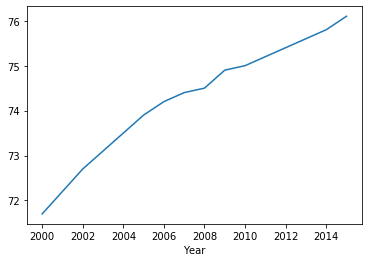

In [59]:
r.groupby(['Country','Year'])['Life expectancy'].sum()['China'].plot(kind = 'line')

In [61]:
d = pd.DataFrame(data = [57, 65, 96, 45, 33, 25, 45, 67, 78, 67])

In [62]:
d.mode()

,0
0,45
1,67


In [64]:
l = pd.DataFrame(data = [45,67])
l.mean()

0    56.0
dtype: float64

In [65]:
d.std()

0    21.36352
dtype: float64

In [66]:
d = pd.DataFrame(data= [57, 65, 96, 45, 33, 25, 45, 67, 78, 67])
d.std()

0    21.36352
dtype: float64

In [4]:
df = pd.read_csv('flower_types.csv')
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
x = df.corr(min_periods=0.8)

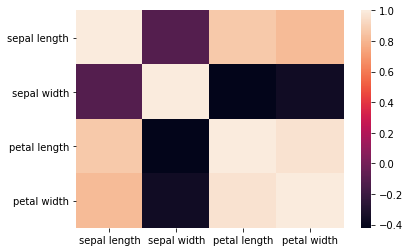

In [8]:
sns.heatmap(x)